In [121]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data
df = pd.read_csv('groupProject/avalanche/resources/DATA.csv')

# Target Columns
target_columns = [
    'HN',
    'HNE',
    'HE',
    'HSE',
    'HS',
    'HSW',
    'HW',
    'HNW',
    'MN',
    'MNE',
    'ME',
    'MSE',
    'MS',
    'MSW',
    'MW',
    'MNW',
    'LN',
    'LNE',
    'LE',
    'LSE',
    'LS',
    'LSW',
    'LW',
    'LNW'
]

# Convert colors to numbers
map = {
    'gray': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4,
    'black': 5,    
}

# For target columns
for col in target_columns:
    df[col] = df[col].map(map)

# Make a new column be the max risk of the target columns
df['max_risk'] = df[target_columns].max(axis=1)
target_columns += ['max_risk']
    
input_columns = [
    'ALTA_Precip_(tenths_mm)',
    'ALTA_Snowfall_(mm)',
    'ALTA_Snow_Depth_(mm)',
    'ALTA_Max_Temp_(tenths_C)',
    'ALTA_Min_Temp_(tenths_C)',
    'ALTA_Multiday_Prec_Days',
    'ALTA_Multiday_Snowfall_Days',
    'ALTA_Multiday_Prec_Days_(tenths_mm)',
    'ALTA_Multiday_Snowfall',
    'ALTA_Temp_at_Observation_(tenths_C)',
    'ALTA_Fog_Ice_Fog',
    'ALTA_Heavy_Fog_Freezing_Fog',
    'ALTA_Ice_Pellets_Sleet',
    'ALTA_Hail',
    'ALTA_Glaze_Rime',
    'ALTA_Weather_Type_07',
    'ALTA_Smoke_Haze',
    'ALTA_Blowing_Drifting_Snow',
    'ALTA_High_Winds',
    'ALTA_Snow_Pellets_Ice_Crystals',
    'BRIGHTON_Precip_(tenths_mm)',
    'BRIGHTON_Snow_Depth_(mm)',
    'BRIGHTON_Max_Temp_(tenths_C)',
    'BRIGHTON_Min_Temp_(tenths_C)',
    'BRIGHTON_Avg_Daily_Temp_(tenths_C)',
    'BRIGHTON_Temp_at_Observation_(tenths_C)',
    'BRIGHTON_Snow_on_Ground_(tenths_mm)',
    'THAYNES_Precip_(tenths_mm)',
    'THAYNES_Snow_Depth_(mm)',
    'THAYNES_Max_Temp_(tenths_C)',
    'THAYNES_Min_Temp_(tenths_C)',
    'THAYNES_Avg_Daily_Temp_(tenths_C)',
    'THAYNES_Temp_at_Observation_(tenths_C)',
    'THAYNES_Snow_on_Ground_(tenths_mm)',
    'PARLEY_SUMMIT_Precip_(tenths_mm)',
    'PARLEY_SUMMIT_Snow_Depth_(mm)',
    'PARLEY_SUMMIT_Max_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Min_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)',
    'PARLEY_SUMMIT_Snow_on_Ground_(tenths_mm)'
]

# add data from previous day
for col in target_columns:
    input_columns.append(col + '_prev')
    df[col + '_prev'] = df[col].shift(1)

# Fill NA with 0
df = df.fillna(0)

X = df[input_columns]
y = df['max_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
# Create the decision tree model
dt = DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 1.0
Test set accuracy: 0.6084142394822006


In [124]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X, y, cv=10)

print("10-fold cross-validation:")
for i, score in enumerate(scores):
    print(f"Fold {i+1} accuracy: {score}")
print(f"Average accuracy: {scores.mean()}")

/Users/brycewall/anaconda3/envs/cs201/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


10-fold cross-validation:
Fold 1 accuracy: 0.6064516129032258
Fold 2 accuracy: 0.6064516129032258
Fold 3 accuracy: 0.5032258064516129
Fold 4 accuracy: 0.5324675324675324
Fold 5 accuracy: 0.512987012987013
Fold 6 accuracy: 0.6428571428571429
Fold 7 accuracy: 0.5584415584415584
Fold 8 accuracy: 0.5584415584415584
Fold 9 accuracy: 0.5974025974025974
Fold 10 accuracy: 0.5194805194805194
Average accuracy: 0.5638206954335987


In [125]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the decision tree model
dt = DecisionTreeClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train and test the model with the best parameters
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)
print("Best parameters:", best_params)


/Users/brycewall/anaconda3/envs/cs201/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Training set accuracy: 0.7714748784440842
Test set accuracy: 0.6957928802588996
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [126]:
# Create the decision tree model with the best parameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10)

# Fit the model to the data
dt.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)


Training set accuracy: 0.7714748784440842
Test set accuracy: 0.6957928802588996


Training set accuracy: 1.0
Test set accuracy: 0.6828478964401294


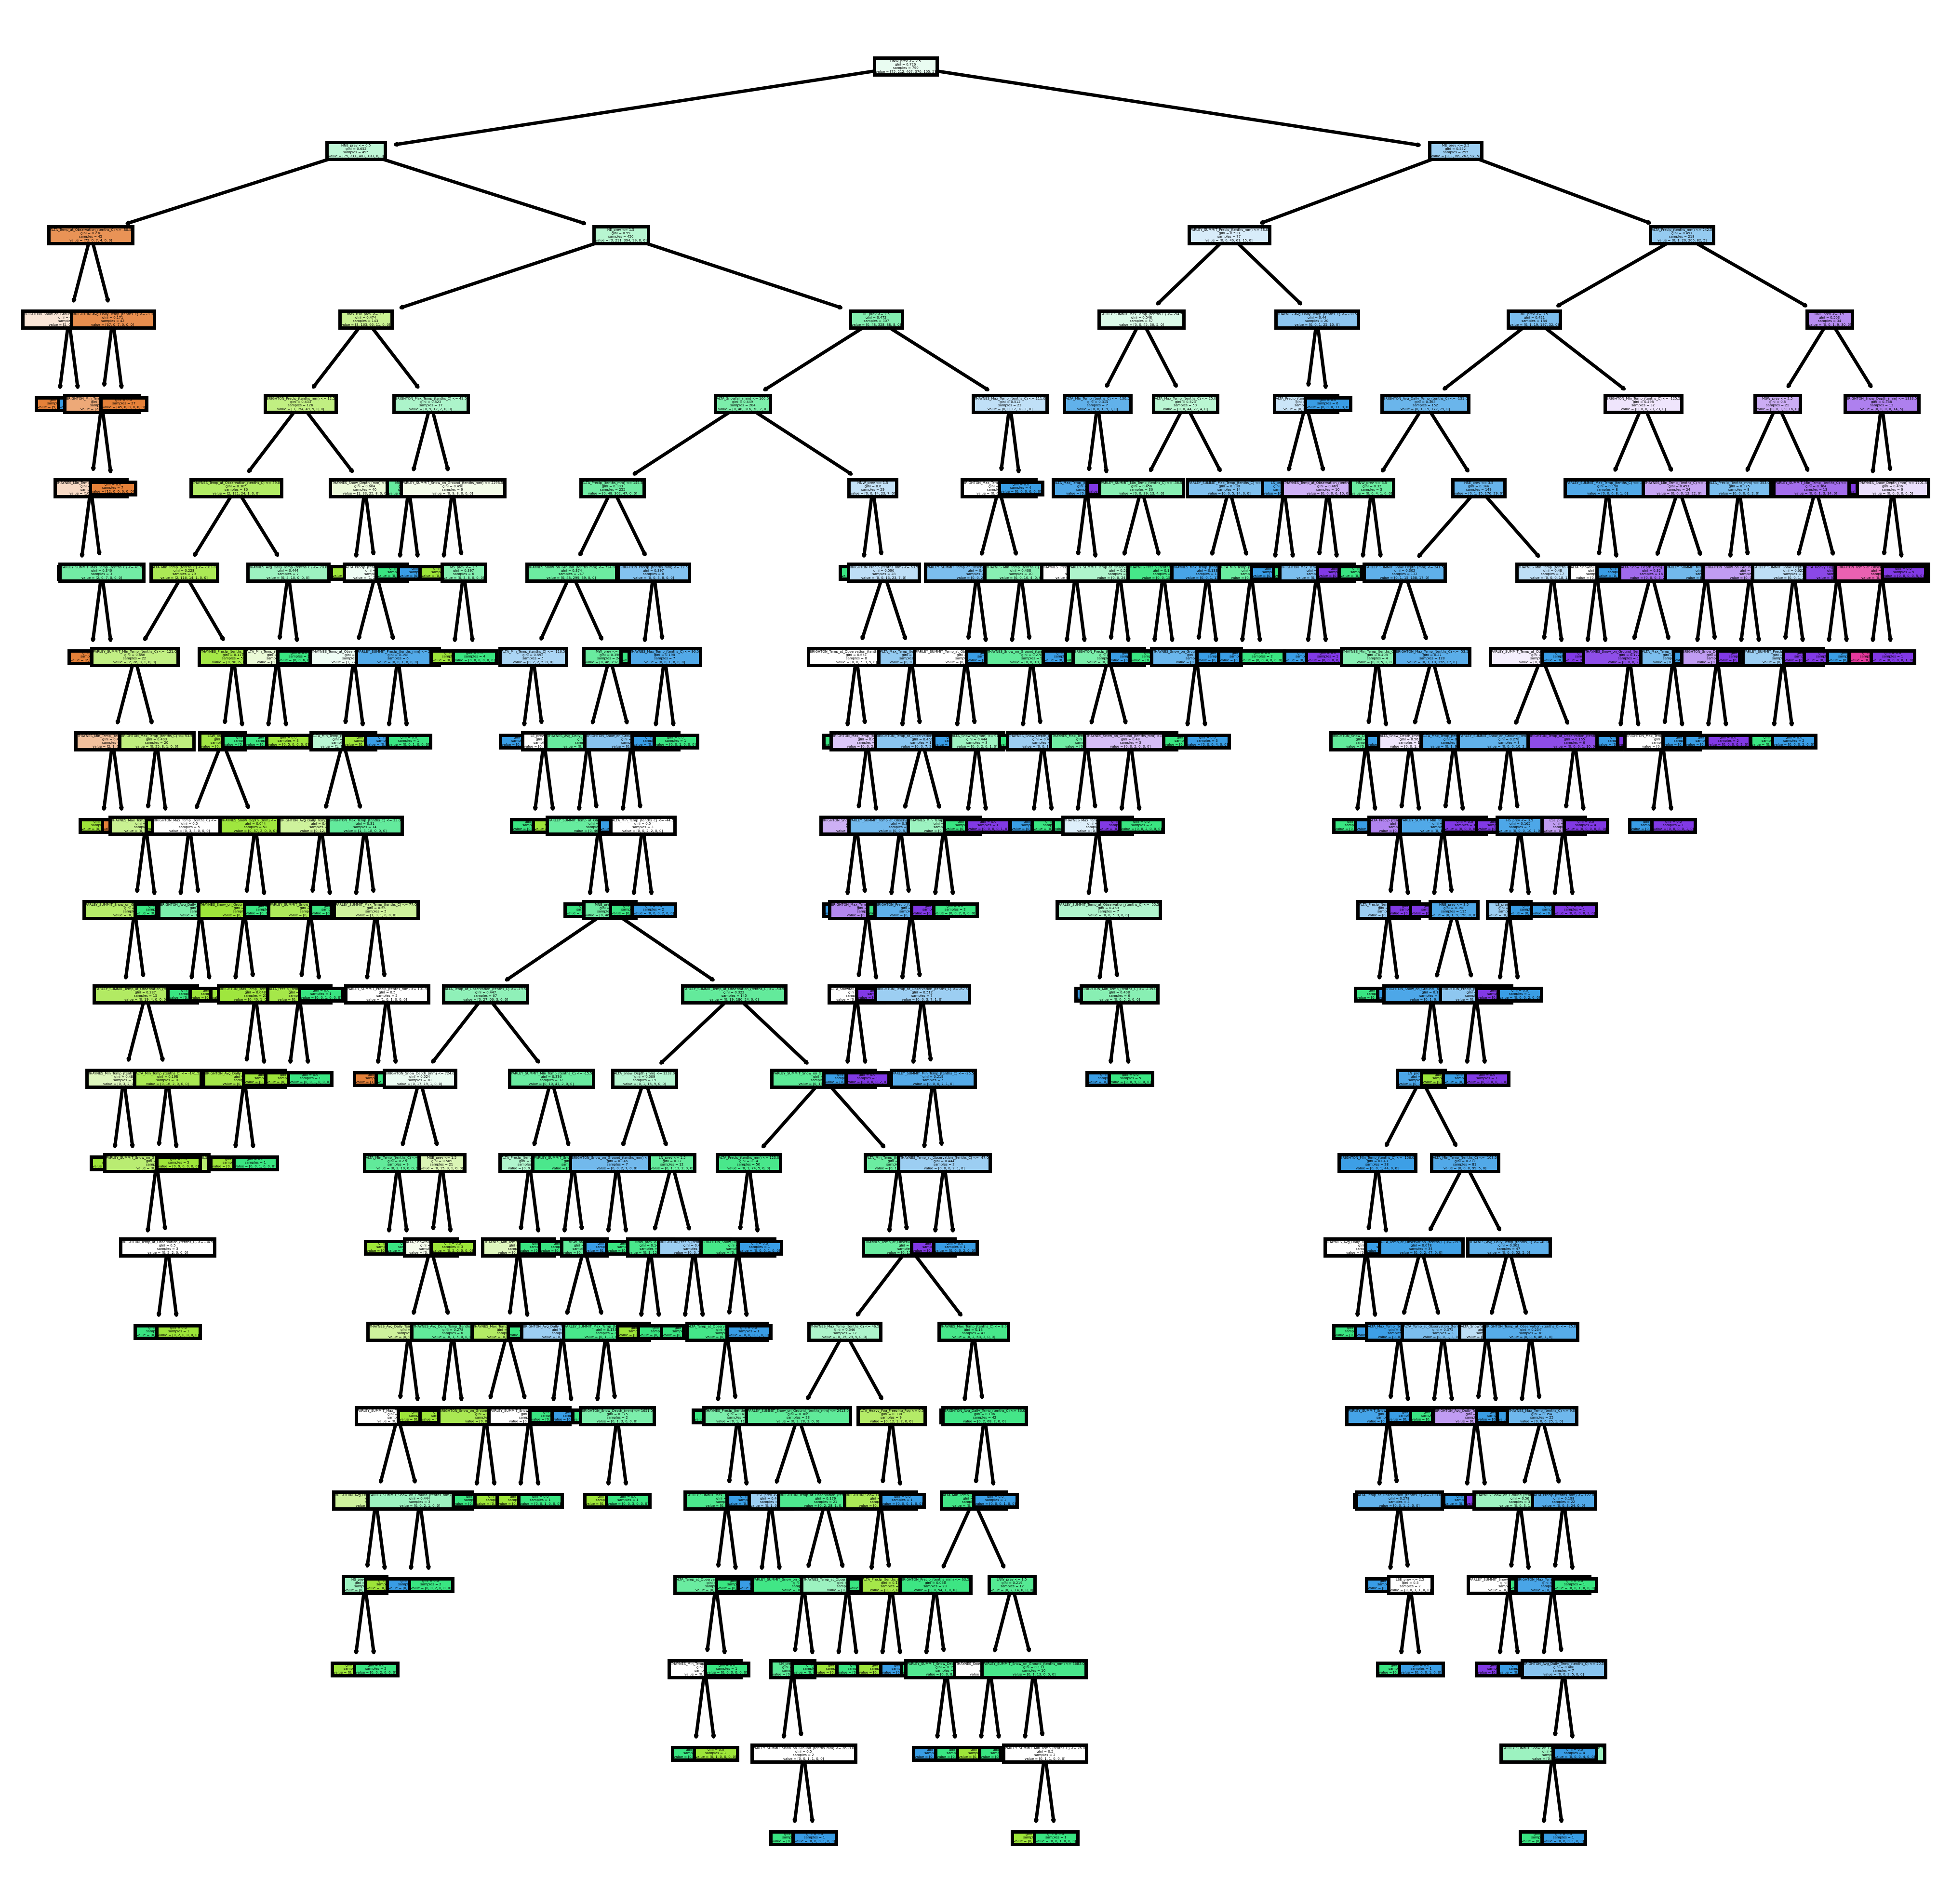

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=500)
tree.plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()




In [128]:
from sklearn.feature_selection import RFE

dt = DecisionTreeClassifier()

rfe = RFE(estimator=dt, n_features_to_select=5)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['ALTA_Precip_(tenths_mm)', 'THAYNES_Snow_on_Ground_(tenths_mm)',
       'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)', 'HE_prev',
       'max_risk_prev'],
      dtype='object')


In [134]:
X_train_selected = X_train[['ALTA_Precip_(tenths_mm)', 'ALTA_Snow_Depth_(mm)', 'THAYNES_Avg_Daily_Temp_(tenths_C)', 'HE_prev', 'max_risk_prev']]
X_test_selected = X_test[['ALTA_Precip_(tenths_mm)', 'ALTA_Snow_Depth_(mm)', 'THAYNES_Avg_Daily_Temp_(tenths_C)', 'HE_prev', 'max_risk_prev']]


dt_selected = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=10, splitter='best')

dt_selected.fit(X_train_selected, y_train)

y_train_pred_selected = dt_selected.predict(X_train_selected)
y_test_pred_selected = dt_selected.predict(X_test_selected)

train_accuracy_selected = accuracy_score(y_train, y_train_pred_selected)
test_accuracy_selected = accuracy_score(y_test, y_test_pred_selected)

print("Training set accuracy with selected features:", train_accuracy_selected)
print("Test set accuracy with selected features:", test_accuracy_selected)


Training set accuracy with selected features: 0.7617504051863857
Test set accuracy with selected features: 0.6504854368932039


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X_train_selected, y_train)

# Make predictions
# Make predictions on the selected training and testing data
y_train_pred_selected = rf.predict(X_train_selected)
y_test_pred_selected = rf.predict(X_test_selected)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred_selected)
test_accuracy = accuracy_score(y_test, y_test_pred_selected)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)




Training set accuracy: 0.9991896272285251
Test set accuracy: 0.6666666666666666


In [157]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

train_accuracy = rf_regressor.score(X_train, y_train)
test_accuracy = rf_regressor.score(X_test, y_test)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)


Training set accuracy: 0.9615345336741465
Test set accuracy: 0.7470153008601381
